In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## 1. Load and review data

In [59]:
titanic_train = pd.read_csv("Titanic_train.csv")

titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
titanic_test = pd.read_csv("Titanic_test.csv")
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Definition of features 
From the metadata on the data source we have the following definition of the features.

| Feature  | Description | Comments |
|--------------|-------------|--------|
| survival	| Survival     | 	0 = No, 1 = Yes
| pclass	| Ticket class 	 | 	1 = 1st, 2 = 2nd, 3 = 3rd
| sex	   | Sex	      | 0 = male, 1 = female
| Age		| Age in years	
| sibsp    | # of siblings / spouses aboard the Titanic	
| parch		| # of parents / children aboard the Titanic	
| ticket	| Ticket number	
| fare		| Passenger fare	
| cabin		| Cabin number	
| embarked	| Port of Embarkation	| 0C = Cherbourg, 1Q = Queenstown, 2S = Southampton

## 2. Clean & mold data

### 2.1 delete none sense feature

In [39]:
none_sense_feature = ['PassengerId', 'Name','Ticket', 'Cabin']

titanic_train = titanic_train.drop(columns=none_sense_feature)
titanic_test = titanic_test.drop(columns=none_sense_feature)

### 2.2 string to int

In [44]:
map = {'male': 0, 'female': 1, 'C': 0, 'Q': 1, 'S': 2}
titanic_train = titanic_train.applymap(lambda s: map.get(s) if s in map else s)
titanic_test = titanic_test.applymap(lambda s: map.get(s) if s in map else s)


NameError: name 'NaN' is not defined

### 2.3 train: delete NaN data / test: NaN to 0

In [47]:
titanic_train.dropna(inplace=True)
pd.isnull(titanic_train).sum()
titanic_test = titanic_test.fillna(0)

### Repleace NaN with mean values
from sklearn.impute import SimpleImputer
fill_null = SimpleImputer(missing_values= np.NaN, strategy='mean')
titanic_train = fill_null.fit_transform(titanic_train)

### 2.4 correlation?

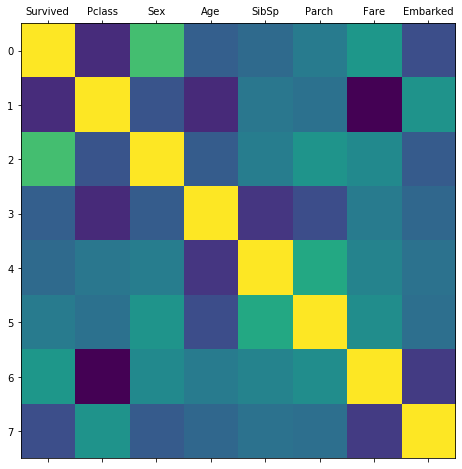

In [49]:
def plot_corr(df, size):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.xticks(range(len(corr.columns)), corr.columns)
    
plot_corr(titanic_train, 8)

### 2.4 split data to x & y

In [50]:
from sklearn.model_selection import train_test_split
feature_name = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare', 'Embarked']
result_name = ['Survived']

x_train = titanic_train[feature_name].values
y_train = titanic_train[result_name].values

## 3. Initial algorithm

### 3.1 GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
titanic_model = GaussianNB()
titanic_model.fit(x_train, y_train.ravel())

KeyError: 'PassengerId'

In [69]:
y_pred = titanic_model.predict(titanic_test)
y_pred = pd.concat([pd.read_csv("Titanic_test.csv")['PassengerId'],pd.DataFrame(y_pred)], axis=1)
pd.DataFrame(y_pred).to_csv("Titanic_predict.csv", index=False)

## 4. Improve perfomance